In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df= pd.read_csv('train.csv')
df.head()

,meal_id,review,rating
0,2890,Ga ada rasa spesial. Sayur lodeh isinya cuma t...,3.0
1,3556,Ganti menu,3.0
2,3620,kurang sreg sama gorengannya aja sih. tempura ...,3.0
3,3531,Ayam dada nya agak keras dan nasinya cenderung...,4.0
4,3744,Pastanya enak banget....top deh :),5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12597 entries, 0 to 12596
Data columns (total 3 columns):
meal_id    12597 non-null int64
review     12595 non-null object
rating     12597 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 246.1+ KB


- dataset nya sejumlah 12.597 row
- ada perbedaan jumlah review dan rating, cek lagi apakah ada Nan value

In [4]:
df.isnull().sum().sort_values(ascending=False)

review     2
rating     0
meal_id    0
dtype: int64

- terdapat NaN pada feature review, sebaiknya 2 data nan value ini di drop saja

In [5]:
df= df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12595 entries, 0 to 12596
Data columns (total 3 columns):
meal_id    12595 non-null int64
review     12595 non-null object
rating     12595 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 344.4+ KB


- total data sekarang ada 12.595 

mari kita lihat ada berapa jenis nilai rating yang diberikan reviewer

In [7]:
jumlah= df['rating'].value_counts().sort_values(ascending=False)
percent= df['rating'].value_counts().sort_values(ascending=False)/len(df)*100

dataRating= pd.concat([jumlah,percent], axis=1, keys=['Jumlah Rating','Percent'])
dataRating

,Jumlah Rating,Percent
4.0,4972,39.475983
5.0,3771,29.940453
3.0,2832,22.485113
2.0,582,4.620881
1.0,438,3.477570


- sebanyak 4972 (39,4 %) pelanggan memberikan review tinggi/maksmum
- total ada sekitar 1021(8%) pelanggan memberikan rating dibawah 3.

cek panjang karakter dari masing-masing review

In [8]:
df['length']= df['review'].apply(len)
df.head()

,meal_id,review,rating,length
0,2890,Ga ada rasa spesial. Sayur lodeh isinya cuma t...,3.0,57
1,3556,Ganti menu,3.0,10
2,3620,kurang sreg sama gorengannya aja sih. tempura ...,3.0,70
3,3531,Ayam dada nya agak keras dan nasinya cenderung...,4.0,74
4,3744,Pastanya enak banget....top deh :),5.0,34


In [9]:
df[df['length']==df['length'].max()]

,meal_id,review,rating,length
4397,4486,"Datengnya pas, jam 11an udah sampe kantor. Tap...",2.0,788


In [10]:
df[df['length']==df['length'].min()]

,meal_id,review,rating,length
114,2275,.,3.0,1
440,3720,E,4.0,1
474,3647,e,5.0,1
520,4035,D,4.0,1
543,4057,E,5.0,1
545,4057,O,4.0,1
564,3813,P,4.0,1
633,3813,U,4.0,1
647,4000,E,5.0,1
734,3814,P,5.0,1


ternyata banyak yang hanya memberikan punctuation(tanda baca) pada kolom review.

__decision__
- pembersihan text tanpa perlu adanya menghilangkan tanda baca

### Cleaning text ###

perbersihan text ini meliputi:
- Handling Upper case (sehingga tidak ada perbedaan huruf kapital)
- mencari root kata dalam pembendaharaan bahasa indonesia (contoh= 'membanggakan' == 'bangga')

In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string

In [12]:
def text_process(mess):
    # Check characters to see if they are in punctuation
#     nopunc = [char for char in mess if char not in string.punctuation]
#     # Join the characters again to form the string.
#     nopunc = ''.join(nopunc)
    
#     Handling lower/upper case
    nopunc= mess.lower()
    
#     Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    output   = stemmer.stem(nopunc)
    
    
#     Returns a list of the cleaned text
    return "".join(output)


In [13]:
df['preprcess']= df['review'].apply(text_process)

In [14]:
df.head()

,meal_id,review,rating,length,preprcess
0,2890,Ga ada rasa spesial. Sayur lodeh isinya cuma t...,3.0,57,ga ada rasa spesial sayur lodeh isi cuma teron...
1,3556,Ganti menu,3.0,10,ganti menu
2,3620,kurang sreg sama gorengannya aja sih. tempura ...,3.0,70,kurang sreg sama goreng aja sih tempura karena...
3,3531,Ayam dada nya agak keras dan nasinya cenderung...,4.0,74,ayam dada nya agak keras dan nasi cenderung se...
4,3744,Pastanya enak banget....top deh :),5.0,34,pasta enak banget top deh


In [15]:
df[df['length']==df['length'].min()]

,meal_id,review,rating,length,preprcess
114,2275,.,3.0,1,
440,3720,E,4.0,1,e
474,3647,e,5.0,1,e
520,4035,D,4.0,1,d
543,4057,E,5.0,1,e
545,4057,O,4.0,1,o
564,3813,P,4.0,1,p
633,3813,U,4.0,1,u
647,4000,E,5.0,1,e
734,3814,P,5.0,1,p


ternyata ada beberapa text review yang berubah menjadi text kosong/ Na 

__decision__
- drop Na setelah pembersihan text

In [23]:
df= df.replace('', np.NaN)

In [26]:
df.isnull().sum()

meal_id       0
review        0
rating        0
length        0
preprcess    32
dtype: int64

In [27]:
df=df.dropna()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12563 entries, 0 to 12596
Data columns (total 5 columns):
meal_id      12563 non-null int64
review       12563 non-null object
rating       12563 non-null float64
length       12563 non-null int64
preprcess    12563 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 490.7+ KB


- data bersih yang akan dimasukkan kedalam model sebanyak 12.563

__Cek apakah panjang review mempengaruhi rating__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135EC040>,
      dtype=object)

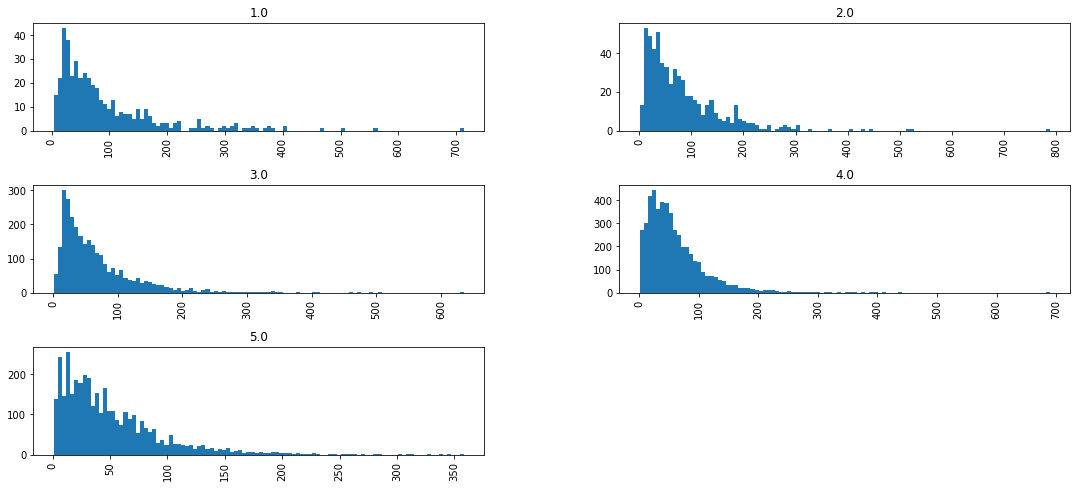

In [33]:
df.hist(column='length',by='rating',bins=100,figsize=(18,8))

- ternyata tidak ada perbedaan yang sigificant antara panjang karakter dengan rating. 

__melihat komposisi kata dalam masing-masing wordcloud__

In [41]:
import nltk
from nltk.corpus import stopwords
import string
import warnings
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
stopword = STOPWORDS

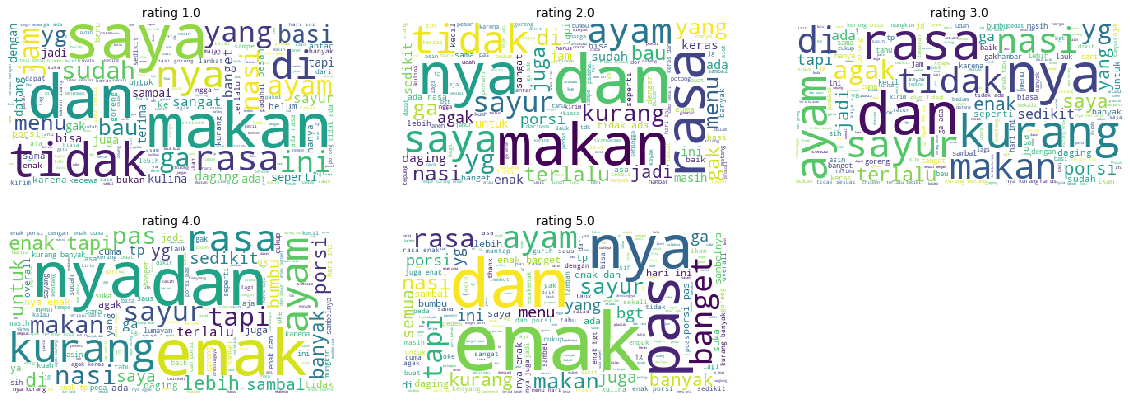

In [64]:
def wordclouds(a,b):
    semua = ''.join(a['preprcess'])
    wordcloud = WordCloud(stopwords = stopword, background_color="white").generate(semua)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(b)
    
plt.figure(figsize=(20,7))
plt.subplot(231)
satu= df[df['rating']==1.]
wordclouds(satu,'rating 1.0')

plt.subplot(232)
dua= df[df['rating']==2.]
wordclouds(dua,'rating 2.0')

plt.subplot(233)
tiga= df[df['rating']==3.]
wordclouds(tiga,'rating 3.0')

plt.subplot(234)
empat= df[df['rating']==4.]
wordclouds(empat,'rating 4.0')

plt.subplot(235)
lima= df[df['rating']==5.]
wordclouds(lima,'rating 5.0')

- rating 1.0 : beberapa kata yang sering digunakan adalah [tidak,basi,makan,rasa, bau, dan,saya]
- rating 2.0 : beberapa kata yang sering digunakan adalah [makan,rasa,ayam,tidak,kurang,keras,sayur]
- ratingg 3.0 : beberapa kata yang sering digunakan adalah [rasa,tidak,ayam,sayur,kurang,sedikit]
- rating 4.0 : beberapa kata yang sering digunakan adalah [nyadan,kurang, enak,sayur, tapi,ayam,porsi]
- rating 5.0 : beberapa kata yang sering digunakan adalah [Enak, dan, pas, banget]

### Splitting Data ###

In [65]:
from sklearn.model_selection import train_test_split

In [106]:
X= df['preprcess']
Y= df['rating']
xtr,xts,ytr,yts = train_test_split(X,Y, random_state=42, test_size=.2)

- data di split dengan data test sebanyak 20% dari data.
- data yang di split merupakan data yang sudah melewati preprocessing

### Modeling ###

sebelum data dimasukkan kedalam model, data text harus di convert dulu kedalam numeric menggunakan metode pembobotan kata (Count Vectorizer, TFIDF). untuk mengefisienkan coding, saya akan menggunakn pipeline.

karena dataset ini termasuk dataset Suppervised Learning berarti bisa menggunakan Regression atau Classification

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [110]:
def evaluation(x,y):
    print(classification_report(x,y))
    cm = confusion_matrix(x,y)
    sb.heatmap(pd.DataFrame(cm),annot=True, cmap="BuPu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Cek Correlation antar feature numerical

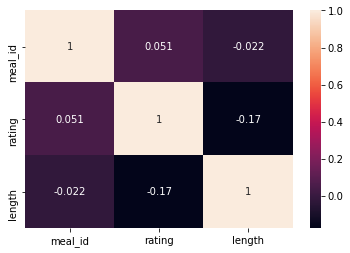

In [36]:
cor= df.corr()
sb.heatmap(cor, annot=True)

- meskipun sangat kecil, korelasi target dengan meal_id sedikit lebih besar daripada target dengan panjang karakter. hal ini membenarkan visualisasi sebelumnya.

__decisiion__
- tidak mengikutsertakan feature meal_id ke dalam training

__Pipeline__

In [108]:
pipeline_Random = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier()),  # train on Count vectors with Random Forest
])

pipeline_logistic = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', LogisticRegression()),  # train on Count vectors with Random Forest
])

In [109]:
pipeline_Random.fit(xtr,ytr)
pipeline_logistic.fit(xtr,ytr)


c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### __Evaluation Matrix__ ####

__Random Forest__

              precision    recall  f1-score   support

         1.0       0.14      0.43      0.21        30
         2.0       0.00      0.00      0.00         5
         3.0       0.65      0.54      0.59       710
         4.0       0.65      0.59      0.62      1102
         5.0       0.61      0.65      0.63       666

    accuracy                           0.59      2513
   macro avg       0.41      0.44      0.41      2513
weighted avg       0.63      0.59      0.61      2513



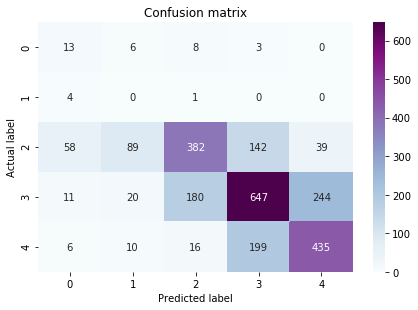

In [112]:
prediksirandom = pipeline_Random.predict(xts)

evaluation(prediksirandom,yts)

__Logistic Regression__

              precision    recall  f1-score   support

         1.0       0.22      0.62      0.32        32
         2.0       0.00      0.00      0.00         8
         3.0       0.64      0.58      0.61       652
         4.0       0.65      0.58      0.61      1113
         5.0       0.65      0.66      0.65       708

    accuracy                           0.60      2513
   macro avg       0.43      0.49      0.44      2513
weighted avg       0.64      0.60      0.61      2513



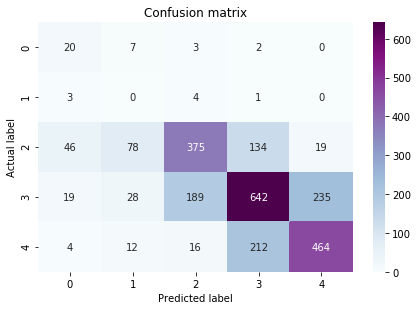

In [113]:
prediksilogist= pipeline_logistic.predict(xts)
evaluation(prediksilogist,yts)

In [133]:
pipeline_SVC2 = Pipeline([
    ('cv', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', SVC()),  # train on Count vectors with Random Forest
])
pipeline_SVC2.fit(xtr,ytr)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degr

              precision    recall  f1-score   support

         1.0       0.17      0.73      0.28        22
         2.0       0.00      0.00      0.00         1
         3.0       0.66      0.54      0.60       723
         4.0       0.66      0.60      0.63      1096
         5.0       0.64      0.68      0.66       671

    accuracy                           0.60      2513
   macro avg       0.43      0.51      0.43      2513
weighted avg       0.65      0.60      0.62      2513



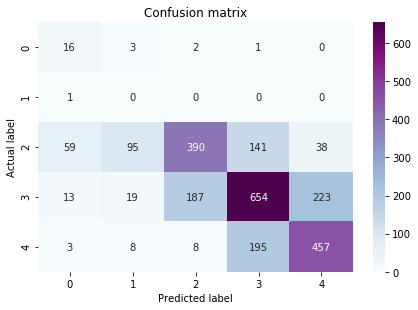

In [134]:
prediksi= pipeline_SVC2.predict(xts)
evaluation(prediksi,yts)

- melihat dari ketiga model diatas accurasi nya rata-rata hampir mirip SVC(60 %), Random Forest (59 %), Logistic regreesion(60 %), akan tetapi ketiganya nilai recall untuk rating 2 = 0.0

__decision__

- hyperparameter Tuning untuk random forest dan SVC

__Hypertuning to improve score__

In [126]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [129]:
# Number of trees in random forest
n_estimators = np.arange(100,400,100)
# Maximum number of levels in tree
max_depth = [10,20,30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf' : min_samples_leaf,
              }
BestParamsforest= RandomizedSearchCV(pipeline_Random2, random_grid, cv=3, n_jobs= -1, verbose=1)
BestParamsforest.fit(xtr,ytr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('bow',
                                              CountVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.int64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                                              min_df=1,
                                                           

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.31      0.59      0.41       309
         4.0       0.81      0.49      0.61      1633
         5.0       0.53      0.67      0.59       571

    accuracy                           0.54      2513
   macro avg       0.33      0.35      0.32      2513
weighted avg       0.68      0.54      0.58      2513



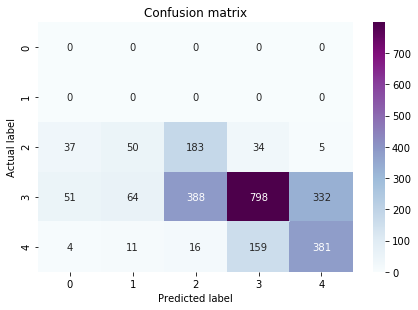

In [130]:
predik= BestParamsforest.predict(xts)
evaluation(predik,yts)

In [135]:
random_grid = {'classifier__C': [ 0.1,1, 10, 100, 1000],
               'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
BestParamsSVC= RandomizedSearchCV(pipeline_SVC2, random_grid, cv=3, n_jobs= -1, verbose=1)
BestParamsSVC.fit(xtr,ytr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('cv',
                                              CountVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.int64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                                              min_df=1,
                                                            

              precision    recall  f1-score   support

         1.0       0.25      0.59      0.35        39
         2.0       0.01      0.20      0.02         5
         3.0       0.69      0.55      0.61       731
         4.0       0.64      0.60      0.61      1058
         5.0       0.64      0.67      0.65       680

    accuracy                           0.60      2513
   macro avg       0.44      0.52      0.45      2513
weighted avg       0.64      0.60      0.62      2513



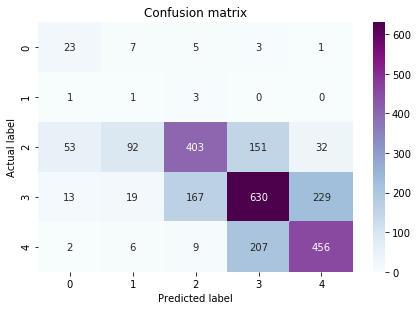

In [136]:
predikS= BestParamsSVC.predict(xts)
evaluation(predikS,yts)

- ada peningkatan nilai recall pada rating 2 pada model SVC menggunakan best parameters

__Conclussion__

- untuk modeling yang akan digunakan adalah Support Vector Classification dengan best parameters